In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('../../data/ab-test.csv')
df.head()

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test


* use the data from the file, read it to a dataframe and make any modification that you may find useful to solve the task
* the figsize is still the same, you can choose whatever fontsize you like
* the color palette should be the same as in the example
* the fontsize of the title is 15
* the width of the box lines is 3, the width of the median lines is 2

In [16]:
before = df[df['time'] == 'before'].pivot_table(values='diff', columns='group', index='uid')
before

group,control,test
uid,,
user_1,NaN,-6.000000
user_12,-103.0,NaN
user_13,-15.5,NaN
user_15,-3.0,NaN
user_16,-153.0,NaN
user_18,NaN,-3.500000
user_19,NaN,-148.000000
user_2,-202.0,NaN
user_20,-16.0,NaN


In [20]:
after = df[df['time'] == 'after'].pivot_table(values='diff', columns='group', index='uid')
after

group,control,test
uid,,
user_1,NaN,-103.333333
user_12,-75.000000,NaN
user_13,-81.500000,NaN
user_15,-32.000000,NaN
user_16,17.500000,NaN
user_18,NaN,-10.000000
user_19,NaN,-82.333333
user_2,-94.000000,NaN
user_20,-49.000000,NaN


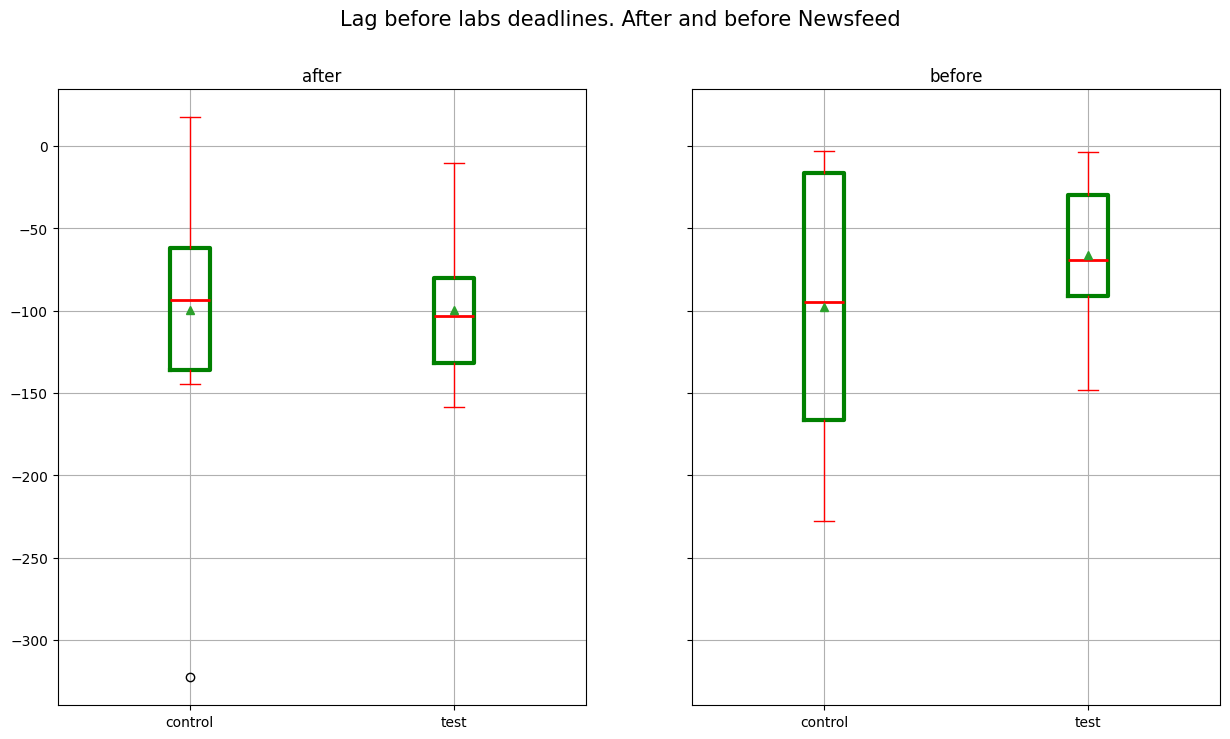

In [57]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
axs[0].boxplot([after['control'].dropna(), after['test'].dropna()], 
               tick_labels=['control', 'test'], 
               boxprops=dict(linewidth=3, color='green'),
               medianprops=dict(linewidth=2, color='red'), 
               whiskerprops = dict(color='red'),
               capprops=dict(color='red'),
               showmeans=True)
axs[1].boxplot([before['control'].dropna(), before['test'].dropna()], 
               tick_labels=['control', 'test'],
               boxprops=dict(linewidth=3, color='green'),
               medianprops=dict(linewidth=2, color='red'), 
               whiskerprops = dict(color='red'),
               capprops=dict(color='red'),
               showmeans=True)
axs[0].set_title('after')
axs[1].set_title('before')
axs[0].grid()
axs[1].grid()
plt.suptitle('Lag before labs deadlines. After and before Newsfeed', fontsize=15)
plt.show()

at the end of your Jupyter Notebook, create a markdown cell and insert the question: “What was the IQR of the control group before the newsfeed?” In your answer, put the approximate value that you can get just by looking at the graph, round it to the nearest 10

150